# Benford´s Law

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## US Population County

In [4]:
df=pd.read_csv("population-county.csv")
df.head()

,state,county,year,births,deaths,domesticmig,gqestimates,internationalmig,naturalinc,netmig,npopchg_,popestimate,rbirth,rdeath,rdomesticmig,residual,rinternationalmig,rnaturalinc,rnetmig
0,1,0,2001,62358,45163,-8850,116446,4806,17195,-4044,11145,4462832.0,13.990211,10.132459,-1.985525,-2006,1.078241,3.857752,-0.907284
1,1,0,2002,59529,45754,-8616,115651,3871,13775,-4745,7074,4469906.0,13.328276,10.244116,-1.929084,-1956,0.866700,3.084161,-1.062384
2,1,0,2003,58571,45883,4821,118109,2080,12688,6901,16692,4486598.0,13.078987,10.245739,1.076536,-2897,0.464467,2.833248,1.541003
3,1,0,2004,59547,46913,5123,116744,4483,12634,9606,19976,4506574.0,13.242713,10.433026,1.139309,-2264,0.996979,2.809687,2.136287
4,1,0,2005,60076,46549,16248,117725,3558,13527,19806,30725,4537299.0,13.285459,10.294041,3.593151,-2608,0.786831,2.991418,4.379982


In [5]:
df["popestimate"].describe()

count    2.554400e+04
mean     1.843989e+05
std      1.122565e+06
min      4.200000e+01
25%      1.120375e+04
50%      2.574950e+04
75%      6.796150e+04
max      3.675667e+07
Name: popestimate, dtype: float64

In [10]:
digits=pd.DataFrame()

In [11]:
digits["First"]=[v//(10**int(np.log10(v))) for v in df["popestimate"]]
digits["Second"]=[(v//(10**int(np.log10(v)-1)))%10 for v in df["popestimate"]]
digits["Third"]=[(v//(10**int(np.log10(v)-2)))%10 for v in df["popestimate"]]
digits["Number"]=[v for v in df["popestimate"]]
digits.head()

,First,Second,Third,Number
0,4.0,4.0,6.0,4462832.0
1,4.0,4.0,6.0,4469906.0
2,4.0,4.0,8.0,4486598.0
3,4.0,5.0,0.0,4506574.0
4,4.0,5.0,3.0,4537299.0


In [21]:
def BenfordsLawFirstDigit(d):
    return np.log10(1+(1/d))

In [22]:
def NewcombLawSecondDigit(d):
    return sum([np.log10(1+(1/(d+10*k))) for k in range(1,10)])

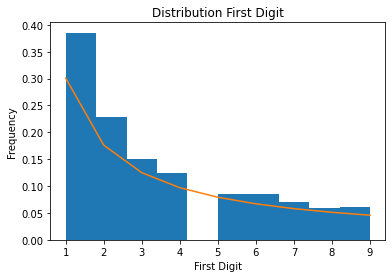

In [24]:
plt.title("Distribution First Digit")
plt.xlabel("First Digit")
plt.ylabel("Frequency")
plt.hist(digits["First"],bins=10,density=True)
plt.plot(range(1,10),[BenfordsLawFirstDigit(d) for d in range(1,10)])

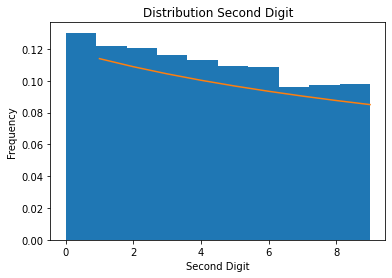

In [25]:
plt.title("Distribution Second Digit")
plt.xlabel("Second Digit")
plt.ylabel("Frequency")
plt.hist(digits["Second"],bins=10,density=True)
plt.plot(range(1,10),[NewcombLawSecondDigit(d) for d in range(1,10)])

(array([0.11235515, 0.11814038, 0.11096322, 0.10817935, 0.10765738,
        0.10900581, 0.11213766, 0.10848384, 0.11222466, 0.11196367]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

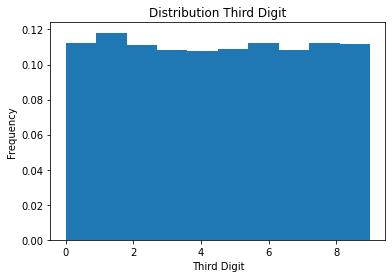

In [20]:
plt.title("Distribution Third Digit")
plt.xlabel("Third Digit")
plt.ylabel("Frequency")
plt.hist(digits["Third"],bins=10,density=True)